In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing
from src.mlhgp import MLHGP, HomGP
from src.imlhgp import IMLHGP
from src.nnpehgp import NNPEHGP
from src.kshgp import KSHGP
from src.ksmlhgp import KSMLHGP
from src.ksimlhgp import KSIMLHGP
from src.rnmlhgp import RNHGP as RNHGP2
from src.rnimlhgp import RNHGP as RNHGP3

## SUPPRESS ALL WARNINGS
import warnings
warnings.filterwarnings("ignore")


## Toy function
Similar to (Makarova et al 2021)

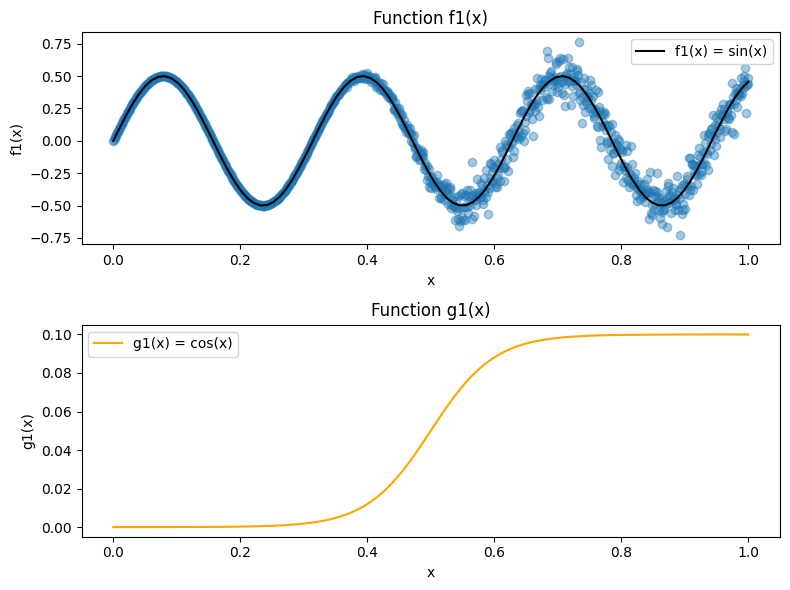

In [2]:
def g1(X):
    # logistic
    X = 20 * X - 10 # [0, 1] -> [-10, 10]
    return 1 / (1 + np.exp(-X))/10
    
def f1(X, add_noise=False):
    target = 0.5*np.sin(X*20) 
    if add_noise:
        rng = np.random.RandomState(1)
        target += rng.normal(np.zeros_like(X), g1(X), size=target.shape)
    return target.squeeze()

x = np.linspace(-0,1,100)
x_noise = np.linspace(0,1,1000)
y_noise = f1(x_noise, True)

# Create subplots: 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))  # 2 rows, 1 column

# Plot f1(x) in the first subplot
ax1.plot(x, f1(x), label='f1(x) = sin(x)',c="black")
ax1.scatter(x_noise, y_noise, alpha=0.4)
ax1.set_title('Function f1(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('f1(x)')
ax1.legend()

# Plot g1(x) in the second subplot
ax2.plot(x, g1(x), label='g1(x) = cos(x)', color='orange')
ax2.set_title('Function g1(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('g1(x)')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## TODO: BO STUFF

In [ ]:
#Plan use similar ACQ as Makarova et al